___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Reading the data files
df_male = pd.read_csv("/content/drive/MyDrive/ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("/content/drive/MyDrive/ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")


#Merge the data files
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

index  SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         0      10037                             231            1282   
1         1      10038                             194            1379   
2         2      10042                             183            1369   
3         3      10043                             261            1356   
4         4      10051                             309            1303   
...     ...        ...                             ...             ...   
3967   1981      29501                             285            1392   
3968   1982      29502                             262            1324   
3969   1983      29503                             260            1334   
3970   1984      29511                             205            1293   
3971   1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
3967                    335                 223          1297   
3968                    301                 202          1204   
3969                    318                 213          1259   
3970                    302                 199          1207   
3971                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
3967                      252               196                368   
3968                      236               181                378   
3969                      234               183                363   
3970                      213               163                376   
3971                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
3967                        299               312               477   
3968                        294               287               468   
3969                        332               299               460   
3970                        276               280               426   
3971                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  wristheight  Gender  \
0                     65               338  ...          756  Female   
1                     64               294  ...          815  Female   
2                     69               309  ...          799  Female   
3                     68               340  ...          818  Female   
4                     67               300  ...          762  Female   
...                  ...               ...  ...          ...     ...   
3967                  72               306  ...          836  Female   
3968                  66               309  ...          804  Fema

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [4]:
df.head()

index  SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      0      10037                             231            1282   
1      1      10038                             194            1379   
2      2      10042                             183            1369   
3      3      10043                             261            1356   
4      4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  ...  wristheight  Gender      Date  \
0                  65               338  ...          756  Female  5-Oct-10   
1                  64               294  ...          815  Female  5-Oct-10   
2                  69               309  ...          799  Female  5-Oct-10   
3                  68               340  ...          818  Female  5-Oct-10   
4                  67               300  ...          762  Female  5-Oct-10   

   Installation     Component                  Branch  PrimaryMOS  \
0     Fort Hood  Regular Army          Combat Support         92Y   
1     Fort Hood  Regular Army  Combat Service Support         25U   
2     Fort Hood  Regular Army  Combat Service Support         35D   
3     Fort Hood  Regular Army  Combat Service Support         25U   
4     Fort Hood  Regular Army             Combat Arms         42A   

   SubjectsBirthLocation  SubjectNumericRace           Ethnicity  DODRace  \
0                Germany                   2                 NaN        2   
1             California                   3             Mexican        3   
2                  Texas                   1                 NaN        1   
3   District of Columbia                   8  Caribbean Islander        2   
4                  Texas                   1                 NaN        1   

   Age  Heightin  Weightlbs  WritingPreference  
0   26        61        142         Right hand  
1   21        64        120         Right hand  
2   23        68        147         Right hand  
3   22        66        175         Right hand  
4   45        63        195         Right hand  

[5 rows x 109 columns]

In [5]:
df.shape

(3972, 109)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Columns: 109 entries, index to WritingPreference
dtypes: int64(100), object(9)
memory usage: 3.3+ MB


In [7]:
df.describe()

index  SubjectId  abdominalextensiondepthsitting  acromialheight  \
count 3972.000   3972.000                        3972.000        3972.000   
mean   992.500  22306.606                         229.651        1335.095   
std    573.381  20902.098                          31.461          58.073   
min      0.000  10037.000                         155.000        1115.000   
25%    496.000  17666.000                         207.000        1298.000   
50%    992.500  22096.500                         227.000        1332.000   
75%   1489.000  26090.000                         249.000        1374.000   
max   1985.000 920103.000                         358.000        1536.000   

       acromionradialelength  anklecircumference  axillaheight  \
count               3972.000            3972.000      3972.000   
mean                 311.198             215.740      1239.030   
std                   17.163              14.890        55.795   
min                  249.000             170.000      1038.000   
25%                  300.000             205.000      1202.000   
50%                  311.000             215.000      1236.000   
75%                  323.000             225.000      1277.000   
max                  371.000             275.000      1419.000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                 3972.000          3972.000           3972.000   
mean                   228.110           182.051            365.349   
std                     11.770             9.641             18.297   
min                    194.000           151.000            283.000   
25%                    220.000           175.000            353.000   
50%                    227.000           182.000            365.000   
75%                    236.000           188.000            378.000   
max                    270.000           216.000            422.000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                   3972.000          3972.000          3972.000   
mean                     305.579           273.300           450.324   
std                       30.753            22.258            28.684   
min                      216.000           197.000           357.000   
25%                      285.000           258.000           430.000   
50%                      304.000           273.000           450.000   
75%                      324.000           287.000           469.000   
max                      435.000           362.000           558.000   

       bimalleolarbreadth  bitragionchinarc  ...  \
count            3972.000          3972.000  ...   
mean               67.048           311.013  ...   
std                 3.485            14.160  ...   
min                55.000           267.000  ...   
25%                65.000           302.000  ...   
50%                67.000           311.000  ...   
75%                69.000           321.000  ...   
max                83.000           370.000  ...   

       verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
count                       3972.000         3972.000      3972.000   
mean                        1559.409          425.403       299.894   
std                           75.976           26.386        32.955   
min                         1342.000          345.000       211.000   
25%                         1508.000          407.000       276.000   
50%                         1555.000          424.500       298.000   
75%                         1610.000          442.000       321.000   
max                         1828.000          532.000       461.000   

       waistcircumference  waistdepth  waistfrontlengthsitting  \
count            3972.000    3972.000                 3972.000   
mean              860.905     213.031                  355.136   
std                99.919      31.370                   23.942   
min               611.000     138.000                  289

In [8]:
#Presnt the repeated columns (weight)
## Convert the unit
df.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df["weightkg"] = df["weightkg"] / 10
df

index  SubjectId  abdominalextensiondepthsitting  acromialheight  \
0         0      10037                             231            1282   
1         1      10038                             194            1379   
2         2      10042                             183            1369   
3         3      10043                             261            1356   
4         4      10051                             309            1303   
...     ...        ...                             ...             ...   
3967   1981      29501                             285            1392   
3968   1982      29502                             262            1324   
3969   1983      29503                             260            1334   
3970   1984      29511                             205            1293   
3971   1985     920103                             238            1346   

      acromionradialelength  anklecircumference  axillaheight  \
0                       301                 204          1180   
1                       320                 207          1292   
2                       329                 233          1271   
3                       306                 214          1250   
4                       308                 214          1210   
...                     ...                 ...           ...   
3967                    335                 223          1297   
3968                    301                 202          1204   
3969                    318                 213          1259   
3970                    302                 199          1207   
3971                    308                 210          1256   

      balloffootcircumference  balloffootlength  biacromialbreadth  \
0                         222               177                373   
1                         225               178                372   
2                         237               196                397   
3                         240               188                384   
4                         217               182                378   
...                       ...               ...                ...   
3967                      252               196                368   
3968                      236               181                378   
3969                      234               183                363   
3970                      213               163                376   
3971                      236               188                361   

      bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                           315               263               466   
1                           272               250               430   
2                           300               276               450   
3                           364               276               484   
4                           320               336               525   
...                         ...               ...               ...   
3967                        299               312               477   
3968                        294               287               468   
3969                        332               299               460   
3970                        276               280               426   
3971                        285               279               433   

      bimalleolarbreadth  bitragionchinarc  ...  wristheight  Gender  \
0                     65               338  ...          756  Female   
1                     64               294  ...          815  Female   
2                     69               309  ...          799  Female   
3                     68               340  ...          818  Female   
4                     67               300  ...          762  Female   
...                  ...               ...  ...          ...     ...   
3967                  72               306  ...          836  Female   
3968                  66               309  ...          804  Fema

In [9]:
df.describe(include="O").T

count unique                     top  freq
Gender                 3972      1                  Female  3972
Date                   3972    127                5-Apr-12    88
Installation           3972     11             Fort Gordon   820
Component              3972      3            Regular Army  2040
Branch                 3972      3  Combat Service Support  2512
PrimaryMOS             3972    181                     92A   428
SubjectsBirthLocation  3972    119              California   308
Ethnicity              1038    112                 Mexican   270
WritingPreference      3972      3              Right hand  3546

In [10]:
df.isnull().sum().any()

True

In [11]:
df.duplicated().sum()

1986

In [12]:
#dropping the duplicated values
df = df.drop_duplicates()

In [13]:
df["WritingPreference"].value_counts()

Right hand                     1773
Left hand                       190
Either hand (No preference)      23
Name: WritingPreference, dtype: int64

In [14]:
df["SubjectsBirthLocation"]

0                    Germany
1                 California
2                      Texas
3       District of Columbia
4                      Texas
                ...         
1981                   Texas
1982                   Texas
1983                   Texas
1984                   Texas
1985                   Texas
Name: SubjectsBirthLocation, Length: 1986, dtype: object

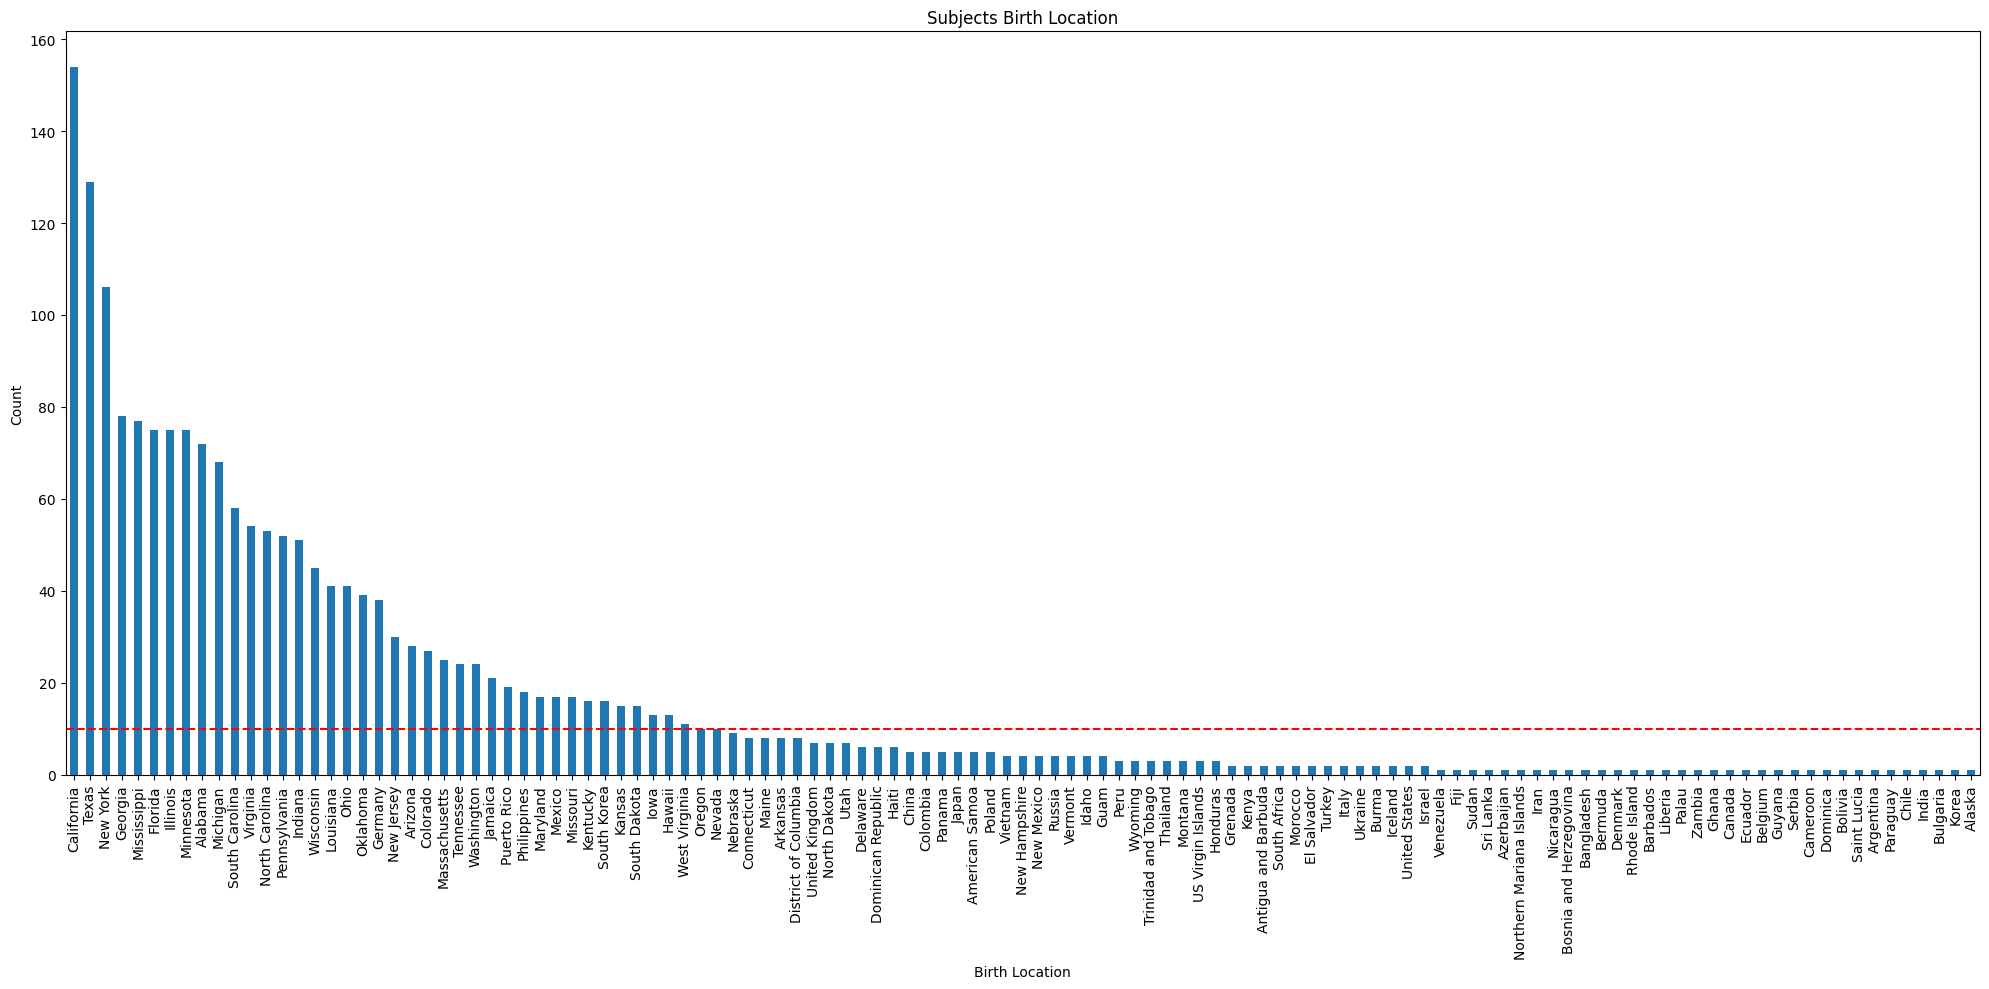

In [15]:
#Visulize the SubjectsBirthLocation column
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  # Some research says 10 rows are enough for each category to be represented
plt.tight_layout();

In [16]:
df = df.drop(
    [
        "Ethnicity",
        "PrimaryMOS",
        "SubjectNumericRace",
        "Weightlbs",
        "Heightin",
        "Installation",
        "SubjectId",
        "Date",
        "Branch",
        "Component",
        "index",
    ],
    axis=1,
)

# Ethnicity Because many missing values >50%
# "PrimaryMOS", "SubjectsBirthLocation" becuase have many unique values
# "SubjectNumericRace" it may mislead the conclusion [It is similar to the target
# Installation it is about the place that the measurments ocour and we do not need it
# Drop ID number since there is no benefit of it during modeling

1    975
2    656
3    239
4     71
6     25
5     20
Name: DODRace, dtype: int64


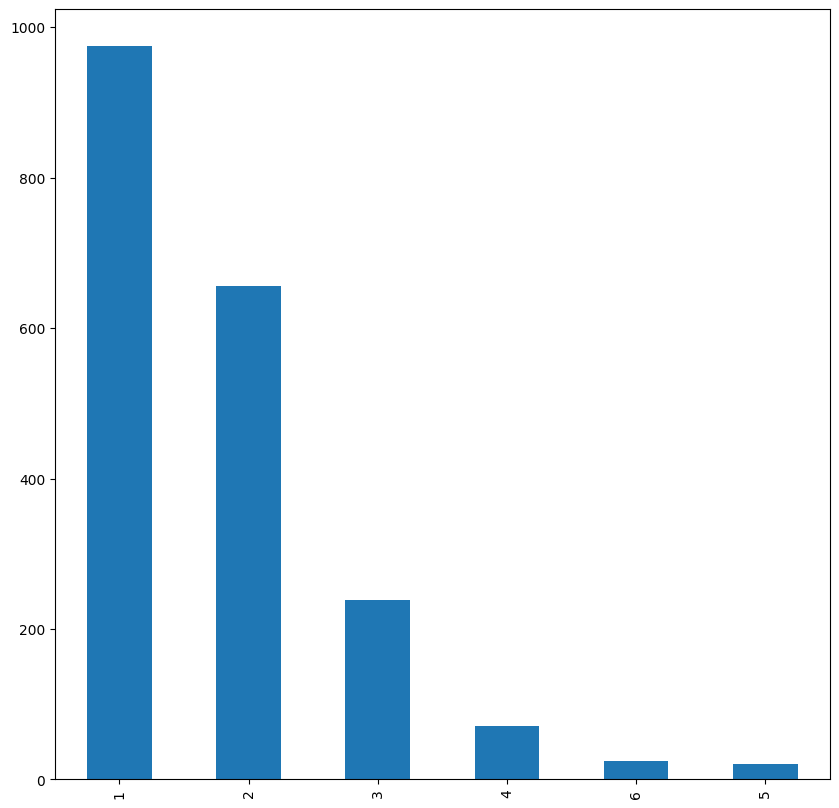

In [17]:
#visulize the target column
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="bar", figsize=(10, 10))
plt.ylabel("");

In [18]:
# Check the DODRace column with >= 500 observations
df.groupby("DODRace").count()

abdominalextensiondepthsitting  acromialheight  \
DODRace                                                   
1                                   975             975   
2                                   656             656   
3                                   239             239   
4                                    71              71   
5                                    20              20   
6                                    25              25   

         acromionradialelength  anklecircumference  axillaheight  \
DODRace                                                            
1                          975                 975           975   
2                          656                 656           656   
3                          239                 239           239   
4                           71                  71            71   
5                           20                  20            20   
6                           25                  25            25   

         balloffootcircumference  balloffootlength  biacromialbreadth  \
DODRace                                                                 
1                            975               975                975   
2                            656               656                656   
3                            239               239                239   
4                             71                71                 71   
5                             20                20                 20   
6                             25                25                 25   

         bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
DODRace                                                                  
1                              975               975               975   
2                              656               656               656   
3                              239               239               239   
4                               71                71                71   
5                               20                20                20   
6                               25                25                25   

         bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
DODRace                                                                    
1                       975               975                        975   
2                       656               656                        656   
3                       239               239                        239   
4                        71                71                         71   
5                        20                20                         20   
6                        25                25                         25   

         bizygomaticbreadth  ...  trochanterionheight  \
DODRace                      ...                        
1                       975  ...                  975   
2                       656  ...                  656   
3                       239  ...                  239   
4                        71  ...                   71   
5                        20  ...                   20   
6                        25  ...                   25   

         verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
DODRace                                                                 
1                                  975              975           975   
2                                  656              656           656   
3                                  239              239           239   
4                                   71               71            71   
5                                   20               20            20   
6                                   25               25            25   

         waistcircumference  waistdepth  waistfrontlengthsitting  \
DODRace                                                            
1                       97

In [19]:
# Just DODRace with > 500 observations
df = df.query("DODRace in [1, 2, 3]")
df.groupby("DODRace").count()
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                231            1282                    301   
1                                194            1379                    320   
2                                183            1369                    329   
3                                261            1356                    306   
4                                309            1303                    308   
...                              ...             ...                    ...   
1981                             285            1392                    335   
1982                             262            1324                    301   
1983                             260            1334                    318   
1984                             205            1293                    302   
1985                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    204          1180                      222   
1                    207          1292                      225   
2                    233          1271                      237   
3                    214          1250                      240   
4                    214          1210                      217   
...                  ...           ...                      ...   
1981                 223          1297                      252   
1982                 202          1204                      236   
1983                 213          1259                      234   
1984                 199          1207                      213   
1985                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  177                373                        315   
1                  178                372                        272   
2                  196                397                        300   
3                  188                384                        364   
4                  182                378                        320   
...                ...                ...                        ...   
1981               196                368                        299   
1982               181                378                        294   
1983               183                363                        332   
1984               163                376                        276   
1985               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  263               466                  65   
1                  250               430                  64   
2                  276               450                  69   
3                  276               484                  68   
4                  336               525                  67   
...                ...               ...                 ...   
1981               312               477                  72   
1982               287               468                  66   
1983               299               460                  70   
1984               280               426                  62   
1985               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  ...  \
0                  338                        301                 141  ...   
1                  294                        270                 126  ...   
2                  309                        270                 128  ...   
3                  340                        294                 144  ...   
4                  300                        295                 135  ...   
...                ...                        ...                 ...  ...   
1981               306                        282                 136  .

In [21]:
#Convert the DODRace classes to objects
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [22]:
df["DODRace"]

0          Black
1       Hispanic
2          White
3          Black
4          White
          ...   
1981    Hispanic
1982    Hispanic
1983       Black
1984    Hispanic
1985    Hispanic
Name: DODRace, Length: 1870, dtype: object

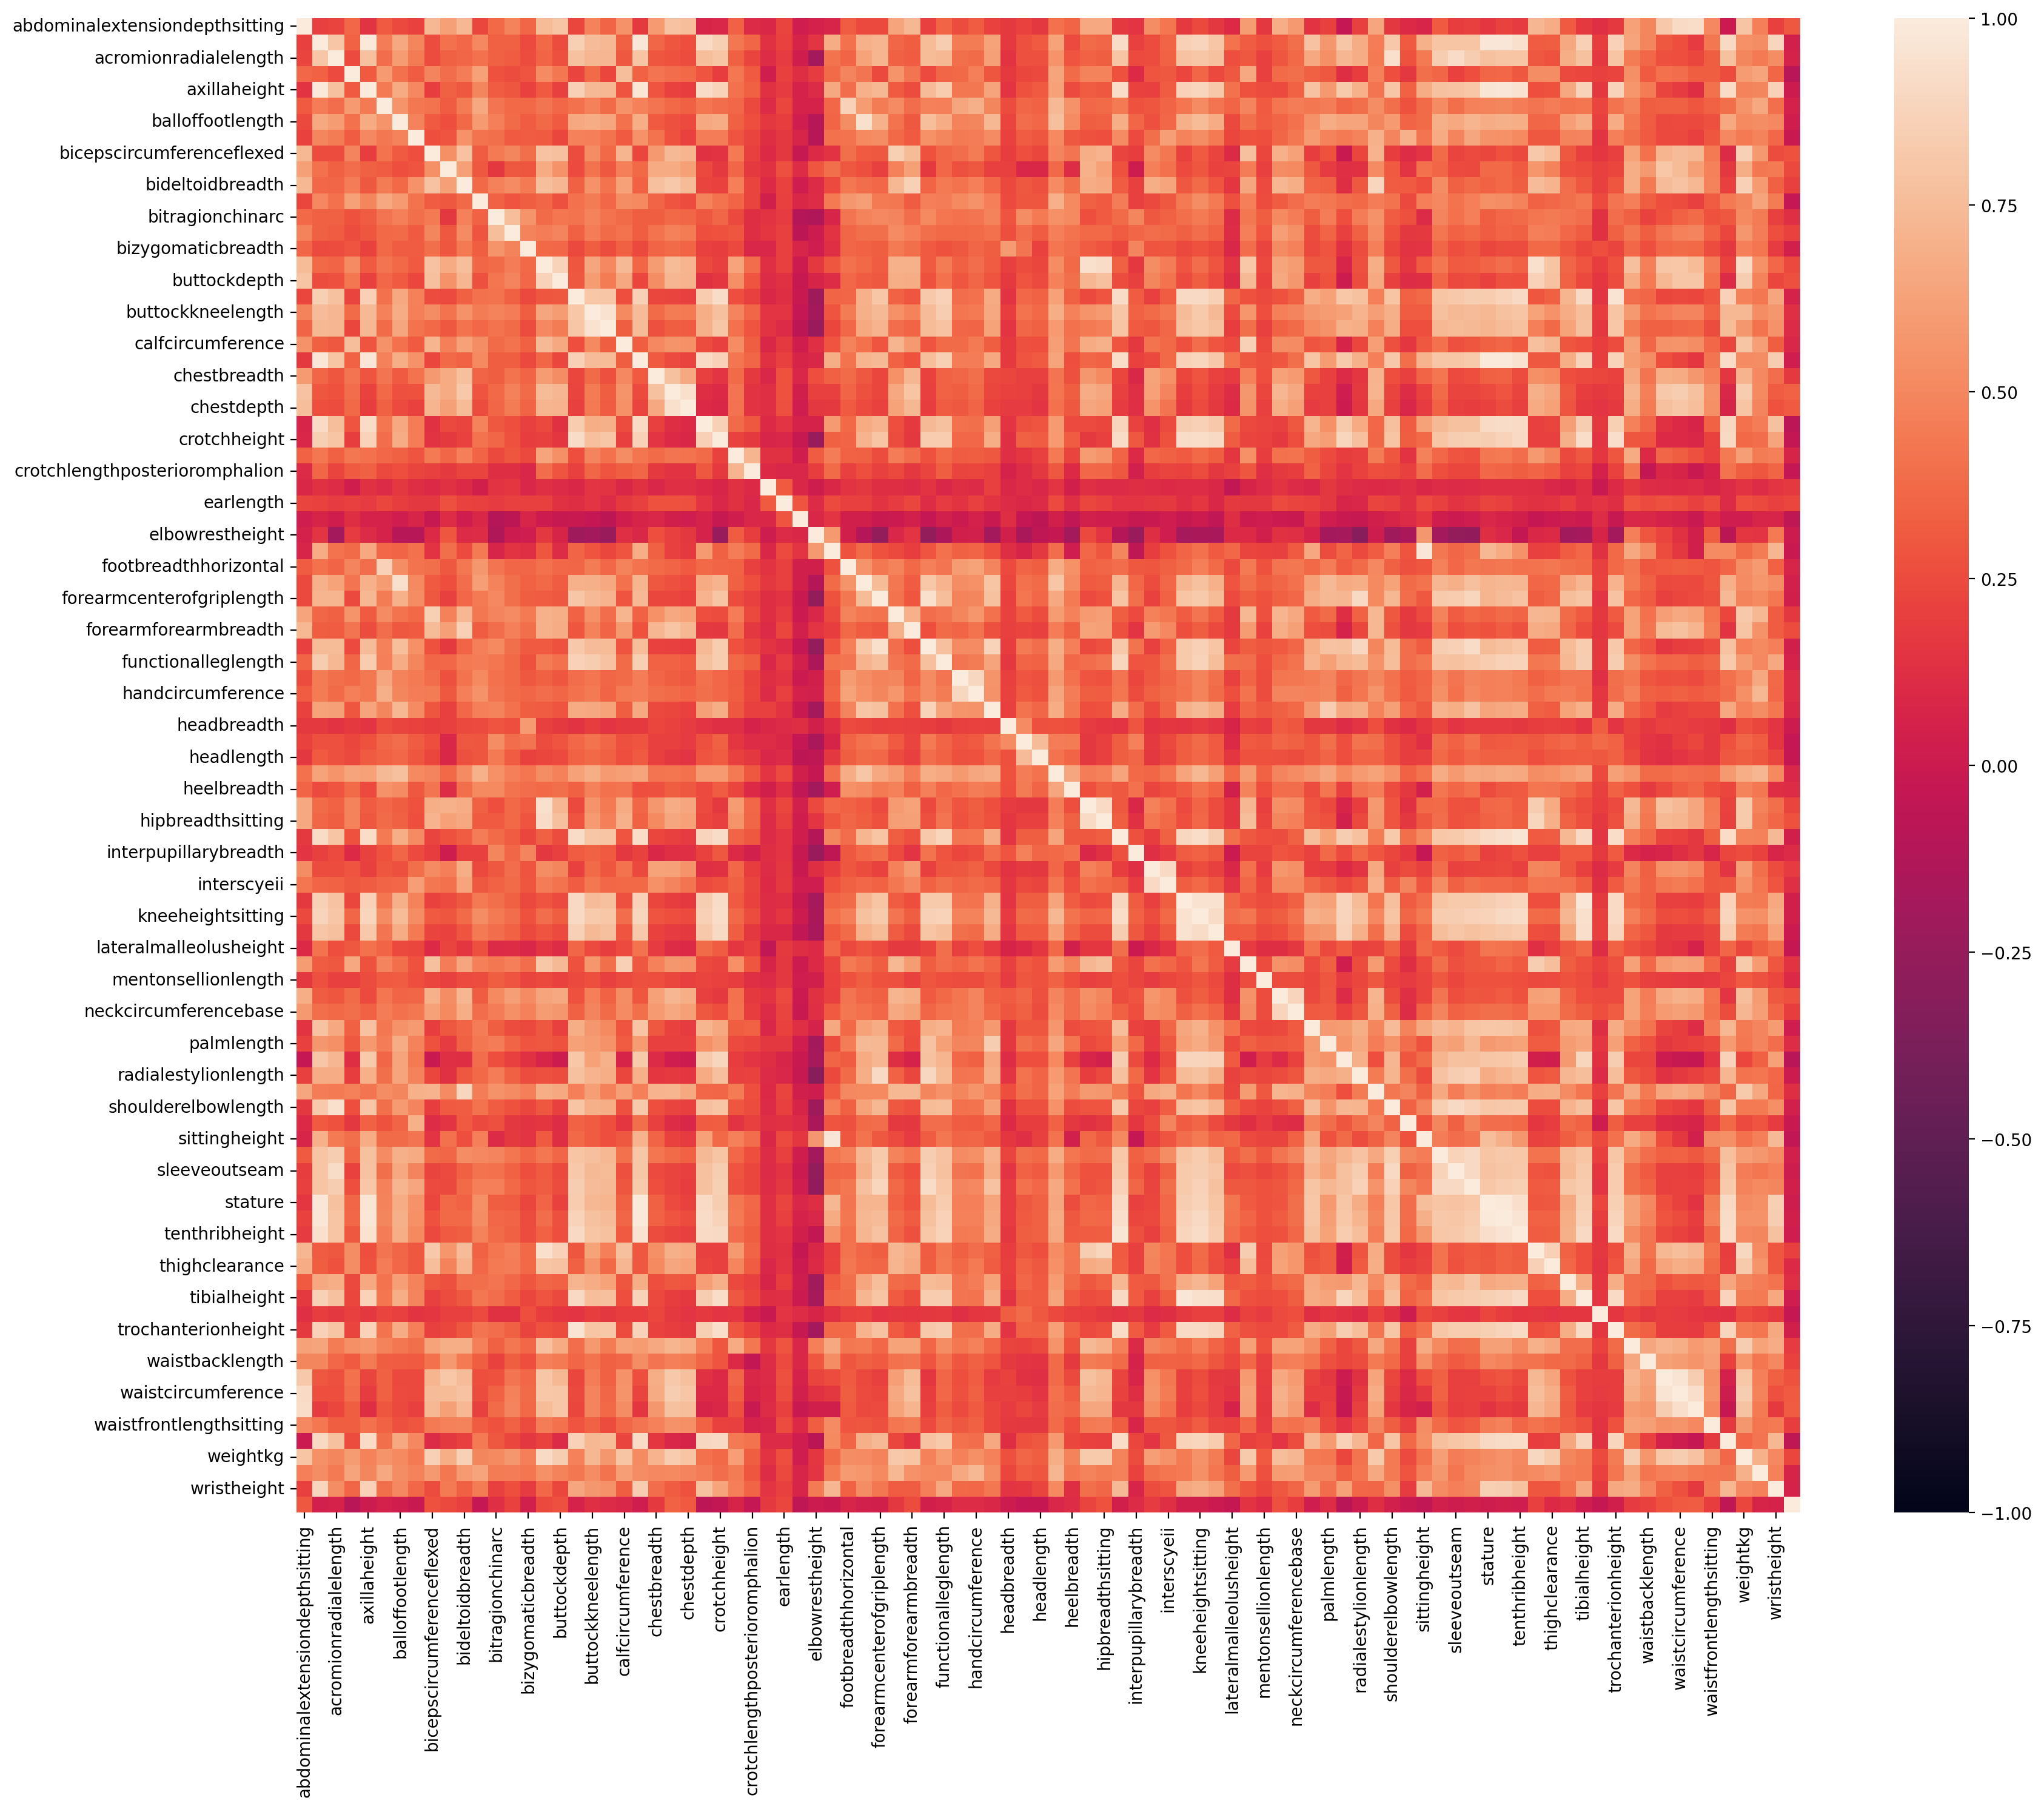

In [23]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1);

In [24]:
df.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 0 to 1985
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: float64(1), int64(93), object(4)
memory usage: 1.4+ MB


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [25]:
X = df.drop(columns=["DODRace"])
y = df.DODRace

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y
)

In [27]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1496, 97)
Train target shape   :  (1496,)
Test features shape  :  (374, 97)
Test target shape    :  (374,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [28]:
# Encode nominal categorical features
cat_onehot = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [29]:
df["SubjectsBirthLocation"].nunique()

107

In [30]:
import sklearn

In [31]:
sklearn.__version__  # 1.3.1

'1.2.2'

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

column_trans = column_trans.set_output(transform="pandas")

In [33]:
df.shape

(1870, 98)

## 1. Logistic model

### Vanilla Logistic Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_lr = Pipeline(steps=operations)

pipe_model_lr.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [50]:
eval_metric(pipe_model_lr, X_train, y_train, X_test, y_test)

Test_Set
[[123   3   5]
 [  2  35  11]
 [  7   6 182]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94       131
    Hispanic       0.80      0.73      0.76        48
       White       0.92      0.93      0.93       195

    accuracy                           0.91       374
   macro avg       0.88      0.87      0.87       374
weighted avg       0.91      0.91      0.91       374


Train_Set
[[506   8  11]
 [ 12 147  32]
 [  7  19 754]]
              precision    recall  f1-score   support

       Black       0.96      0.96      0.96       525
    Hispanic       0.84      0.77      0.81       191
       White       0.95      0.97      0.96       780

    accuracy                           0.94      1496
   macro avg       0.92      0.90      0.91      1496
weighted avg       0.94      0.94      0.94      1496



### Cross validation

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_lr = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model_lr,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.702
score_time                 0.082
test_accuracy              0.861
train_accuracy             0.948
test_precision_weighted    0.859
train_precision_weighted   0.947
test_recall_weighted       0.861
train_recall_weighted      0.948
test_f1_weighted           0.859
train_f1_weighted          0.948
dtype: float64

In [411]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])

scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

In [57]:
from sklearn.model_selection import cross_val_score, cross_validate

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_lr = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model_lr, X_train, y_train, scoring=scoring, cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   0.563
score_time                 0.057
test_f1_hispanic           0.583
train_f1_hispanic          0.827
test_precision_hispanic    0.601
train_precision_hispanic   0.870
test_recall_hispanic       0.571
train_recall_hispanic      0.788
dtype: float64

### Logistic Model GridsearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [59]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    solver='saga'))])

In [60]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.706
mean_train_score   0.851
Name: 11, dtype: object

In [61]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[116  10   5]
 [  0  44   4]
 [  4  15 176]]
              precision    recall  f1-score   support

       Black       0.97      0.89      0.92       131
    Hispanic       0.64      0.92      0.75        48
       White       0.95      0.90      0.93       195

    accuracy                           0.90       374
   macro avg       0.85      0.90      0.87       374
weighted avg       0.92      0.90      0.90       374


Train_Set
[[488  23  14]
 [ 10 159  22]
 [ 10  77 693]]
              precision    recall  f1-score   support

       Black       0.96      0.93      0.94       525
    Hispanic       0.61      0.83      0.71       191
       White       0.95      0.89      0.92       780

    accuracy                           0.90      1496
   macro avg       0.84      0.88      0.86      1496
weighted avg       0.91      0.90      0.90      1496



# Class weight for logisticRegression Model

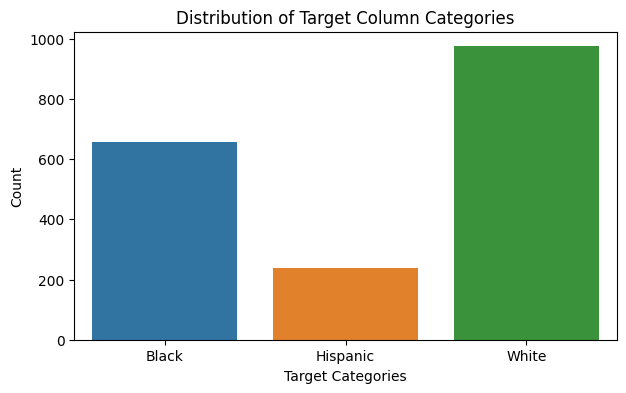

In [62]:
# demonstrate the target column distribution
sns.countplot(x="DODRace", data=df)
plt.title("Distribution of Target Column Categories")
plt.xlabel("Target Categories")
plt.ylabel("Count")
plt.show()

In [64]:
# Try to maximize the Recall score by balancing the data
lr = LogisticRegression(C=10, solver="saga", class_weight="balanced")

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model_balanced = Pipeline(steps=operations)

pipe_model_balanced.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=10, class_weight='balanced',
                                    solver='saga'))])

In [65]:
eval_metric(pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[119   9   3]
 [  1  42   5]
 [  6  15 174]]
              precision    recall  f1-score   support

       Black       0.94      0.91      0.93       131
    Hispanic       0.64      0.88      0.74        48
       White       0.96      0.89      0.92       195

    accuracy                           0.90       374
   macro avg       0.85      0.89      0.86       374
weighted avg       0.91      0.90      0.90       374


Train_Set
[[494  20  11]
 [  6 175  10]
 [ 11  70 699]]
              precision    recall  f1-score   support

       Black       0.97      0.94      0.95       525
    Hispanic       0.66      0.92      0.77       191
       White       0.97      0.90      0.93       780

    accuracy                           0.91      1496
   macro avg       0.87      0.92      0.88      1496
weighted avg       0.93      0.91      0.92      1496



In [66]:
!pip install scikit-plot

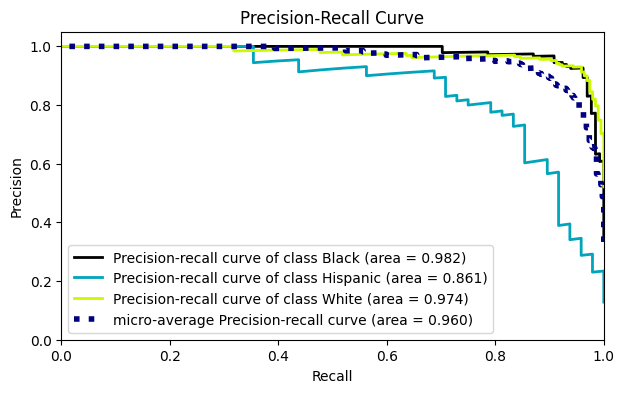

In [67]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve

operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [309]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.29275099541473965

In [400]:
y_pred = pipe_model_lr.predict(X_test)

In [401]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

log_f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
log_recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

## 2. SVC

### Vanilla SVC model

In [409]:
from sklearn.svm import SVC

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)

SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[118   3  10]
 [  2  18  28]
 [  3   4 188]]
              precision    recall  f1-score   support

       Black       0.96      0.90      0.93       131
    Hispanic       0.72      0.38      0.49        48
       White       0.83      0.96      0.89       195

    accuracy                           0.87       374
   macro avg       0.84      0.75      0.77       374
weighted avg       0.86      0.87      0.85       374


Train_Set
[[506   5  14]
 [ 28  90  73]
 [  7   3 770]]
              precision    recall  f1-score   support

       Black       0.94      0.96      0.95       525
    Hispanic       0.92      0.47      0.62       191
       White       0.90      0.99      0.94       780

    accuracy                           0.91      1496
   macro avg       0.92      0.81      0.84      1496
weighted avg       0.91      0.91      0.90      1496



In [412]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

S_model = Pipeline(steps=operations)
scores = cross_validate(S_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.392
train_f1_hispanic          0.622
test_precision_hispanic    0.750
train_precision_hispanic   0.938
test_recall_hispanic       0.272
train_recall_hispanic      0.465
dtype: float64

In [161]:
#the SVM model with balanced data

operations = [("encoder", column_trans), ("scaler", MinMaxScaler()),
              ("SVC", SVC(gamma='scale', class_weight='balanced'))]

SVM_pipe_model_balanced = Pipeline(steps=operations)

SVM_pipe_model_balanced.fit(X_train, y_train)

eval_metric(SVM_pipe_model_balanced, X_train, y_train, X_test, y_test)

Test_Set
[[115  10   6]
 [  2  39   7]
 [  3  16 176]]
              precision    recall  f1-score   support

       Black       0.96      0.88      0.92       131
    Hispanic       0.60      0.81      0.69        48
       White       0.93      0.90      0.92       195

    accuracy                           0.88       374
   macro avg       0.83      0.86      0.84       374
weighted avg       0.90      0.88      0.89       374


Train_Set
[[481  29  15]
 [ 11 158  22]
 [ 11  85 684]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       525
    Hispanic       0.58      0.83      0.68       191
       White       0.95      0.88      0.91       780

    accuracy                           0.88      1496
   macro avg       0.83      0.87      0.84      1496
weighted avg       0.90      0.88      0.89      1496



In [162]:
#cross validation for SVM_balanced model
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(SVM_pipe_model_balanced,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.598
train_f1_hispanic          0.685
test_precision_hispanic    0.510
train_precision_hispanic   0.582
test_recall_hispanic       0.733
train_recall_hispanic      0.832
dtype: float64

###  SVC Model GridsearchCV

In [173]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [174]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [175]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [176]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [177]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.733
mean_train_score   0.830
Name: 3, dtype: object

In [178]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[115  10   6]
 [  2  39   7]
 [  3  16 176]]
              precision    recall  f1-score   support

       Black       0.96      0.88      0.92       131
    Hispanic       0.60      0.81      0.69        48
       White       0.93      0.90      0.92       195

    accuracy                           0.88       374
   macro avg       0.83      0.86      0.84       374
weighted avg       0.90      0.88      0.89       374


Train_Set
[[481  29  15]
 [ 11 157  23]
 [ 11  86 683]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       525
    Hispanic       0.58      0.82      0.68       191
       White       0.95      0.88      0.91       780

    accuracy                           0.88      1496
   macro avg       0.83      0.87      0.84      1496
weighted avg       0.90      0.88      0.89      1496



In [180]:
scoring = {"f1_hispanic":f1_hispanic,
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}

scores = cross_validate(svm_model_grid,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.581
train_f1_hispanic          0.667
test_precision_hispanic    0.490
train_precision_hispanic   0.564
test_recall_hispanic       0.727
train_recall_hispanic      0.817
dtype: float64

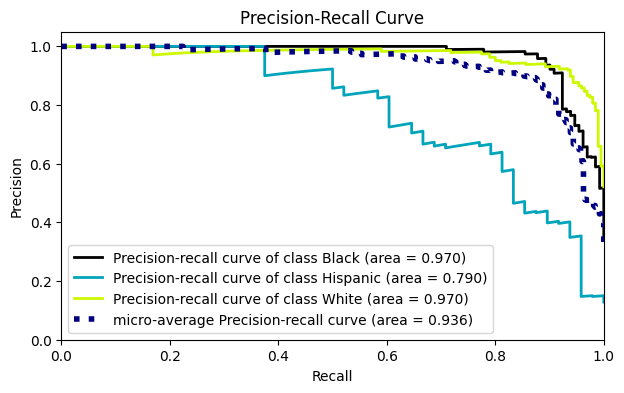

In [181]:
#Applying the Precision and Recall Curve to evaluate the SVM model
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]#Taking the best parameters for the SVM model

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [269]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.7900368356178514

In [426]:
y_pred = SVM_pipe_model.predict(X_test)

In [427]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

svc_f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
svc_recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

In [428]:
svc_recall

0.8663101604278075

## 3. RF

### Vanilla RF Model

In [182]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_onehot),
                            remainder='passthrough',verbose_feature_names_out=False) # MinMaxScaler()

column_trans=column_trans.set_output(transform="pandas")

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [185]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[110   0  21]
 [  2   8  38]
 [  5   3 187]]
              precision    recall  f1-score   support

       Black       0.94      0.84      0.89       131
    Hispanic       0.73      0.17      0.27        48
       White       0.76      0.96      0.85       195

    accuracy                           0.82       374
   macro avg       0.81      0.66      0.67       374
weighted avg       0.82      0.82      0.79       374


Train_Set
[[525   0   0]
 [  0 191   0]
 [  0   0 780]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       525
    Hispanic       1.00      1.00      1.00       191
       White       1.00      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



***There is an obvious over-fitting here so let's try adding Class_weight***

In [186]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model_RF = Pipeline(steps=operations)

pipe_model_RF.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [187]:
eval_metric(pipe_model_RF, X_train, y_train, X_test, y_test)

Test_Set
[[110   0  21]
 [  2  10  36]
 [  7   3 185]]
              precision    recall  f1-score   support

       Black       0.92      0.84      0.88       131
    Hispanic       0.77      0.21      0.33        48
       White       0.76      0.95      0.85       195

    accuracy                           0.82       374
   macro avg       0.82      0.67      0.68       374
weighted avg       0.82      0.82      0.79       374


Train_Set
[[525   0   0]
 [  0 191   0]
 [  0   0 780]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       525
    Hispanic       1.00      1.00      1.00       191
       White       1.00      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



In [207]:
#Adding other parameters to enhance the results
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier
               (max_depth=3, class_weight="balanced", random_state=101))]

pipe_model_RF = Pipeline(steps=operations)

pipe_model_RF.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=101))])

In [208]:
eval_metric(pipe_model_RF, X_train, y_train, X_test, y_test)

Test_Set
[[ 98  21  12]
 [  2  27  19]
 [ 28  47 120]]
              precision    recall  f1-score   support

       Black       0.77      0.75      0.76       131
    Hispanic       0.28      0.56      0.38        48
       White       0.79      0.62      0.69       195

    accuracy                           0.66       374
   macro avg       0.61      0.64      0.61       374
weighted avg       0.72      0.66      0.68       374


Train_Set
[[433  61  31]
 [ 28 109  54]
 [ 83 166 531]]
              precision    recall  f1-score   support

       Black       0.80      0.82      0.81       525
    Hispanic       0.32      0.57      0.41       191
       White       0.86      0.68      0.76       780

    accuracy                           0.72      1496
   macro avg       0.66      0.69      0.66      1496
weighted avg       0.77      0.72      0.73      1496



In [198]:
RF_operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=3))]


model = Pipeline(steps=RF_operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True,
                        n_jobs=-1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.365
train_f1_hispanic          0.417
test_precision_hispanic    0.284
train_precision_hispanic   0.326
test_recall_hispanic       0.523
train_recall_hispanic      0.579
dtype: float64

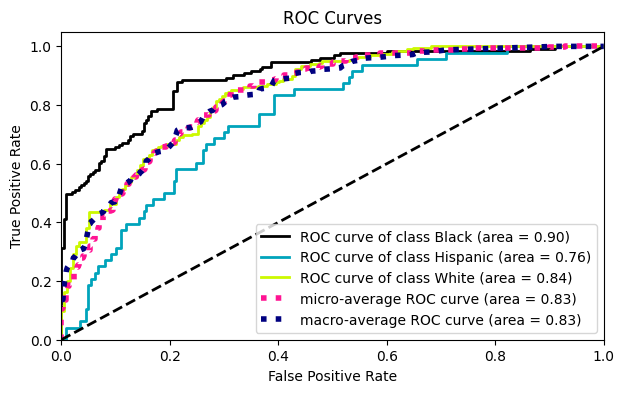

In [209]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_probe = pipe_model_RF.predict_proba(X_test)

plot_roc(y_test, y_pred_probe)
plt.show();

In [275]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.29275099541473965

In [404]:
y_pred = pipe_model_RF.predict(X_test)

In [405]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

RF_f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
RF_recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')

In [430]:
RF_f1

0.675190173443705

In [431]:
RF_recall

0.6550802139037433

In [214]:
#applying the feature_importances_ to select the most effective features for enhancing our model
pipe_model_RF["RF_model"].feature_importances_

array([0.        , 0.        , 0.00193102, 0.00178654, 0.01298084,
       0.00334557, 0.00272633, 0.01489631, 0.00090214, 0.00492798,
       0.        , 0.00282058, 0.02568169, 0.00093626, 0.        ,
       0.07342113, 0.00843807, 0.00824984, 0.0003664 , 0.00221641,
       0.02710087, 0.0271095 , 0.01173111, 0.0006337 , 0.00850084,
       0.00566817, 0.00064913, 0.00031771, 0.00461979, 0.01489329,
       0.00252508, 0.        , 0.        , 0.00121431, 0.00748157,
       0.08579389, 0.04846097, 0.00046382, 0.00838181, 0.05464565,
       0.00281189, 0.0008722 , 0.05018082, 0.00184412, 0.00330824,
       0.00149842, 0.03075536, 0.00092094, 0.04187886, 0.00272142,
       0.00115236, 0.03638294, 0.00399565, 0.0015996 , 0.01176207,
       0.03296032, 0.        , 0.        , 0.00094585, 0.00707016,
       0.00834967, 0.00563601, 0.00053757, 0.00292401, 0.        ,
       0.        , 0.00236486, 0.00918419, 0.00260435, 0.07667896,
       0.        , 0.0031617 , 0.        , 0.04001446, 0.00367

In [215]:
features = pipe_model_RF["encoder"].get_feature_names_out()
features

array(['Gender', 'WritingPreference', 'SubjectsBirthLocation',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [216]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_,
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
elbowrestheight                              0.086
radialestylionlength                         0.077
bitragionchinarc                             0.073
forearmcenterofgriplength                    0.055
forearmhandlength                            0.050
...                                            ...
earbreadth                                   0.000
crotchlengthposterioromphalion               0.000
bimalleolarbreadth                           0.000
biacromialbreadth                            0.000
Age                                          0.000

[97 rows x 1 columns]

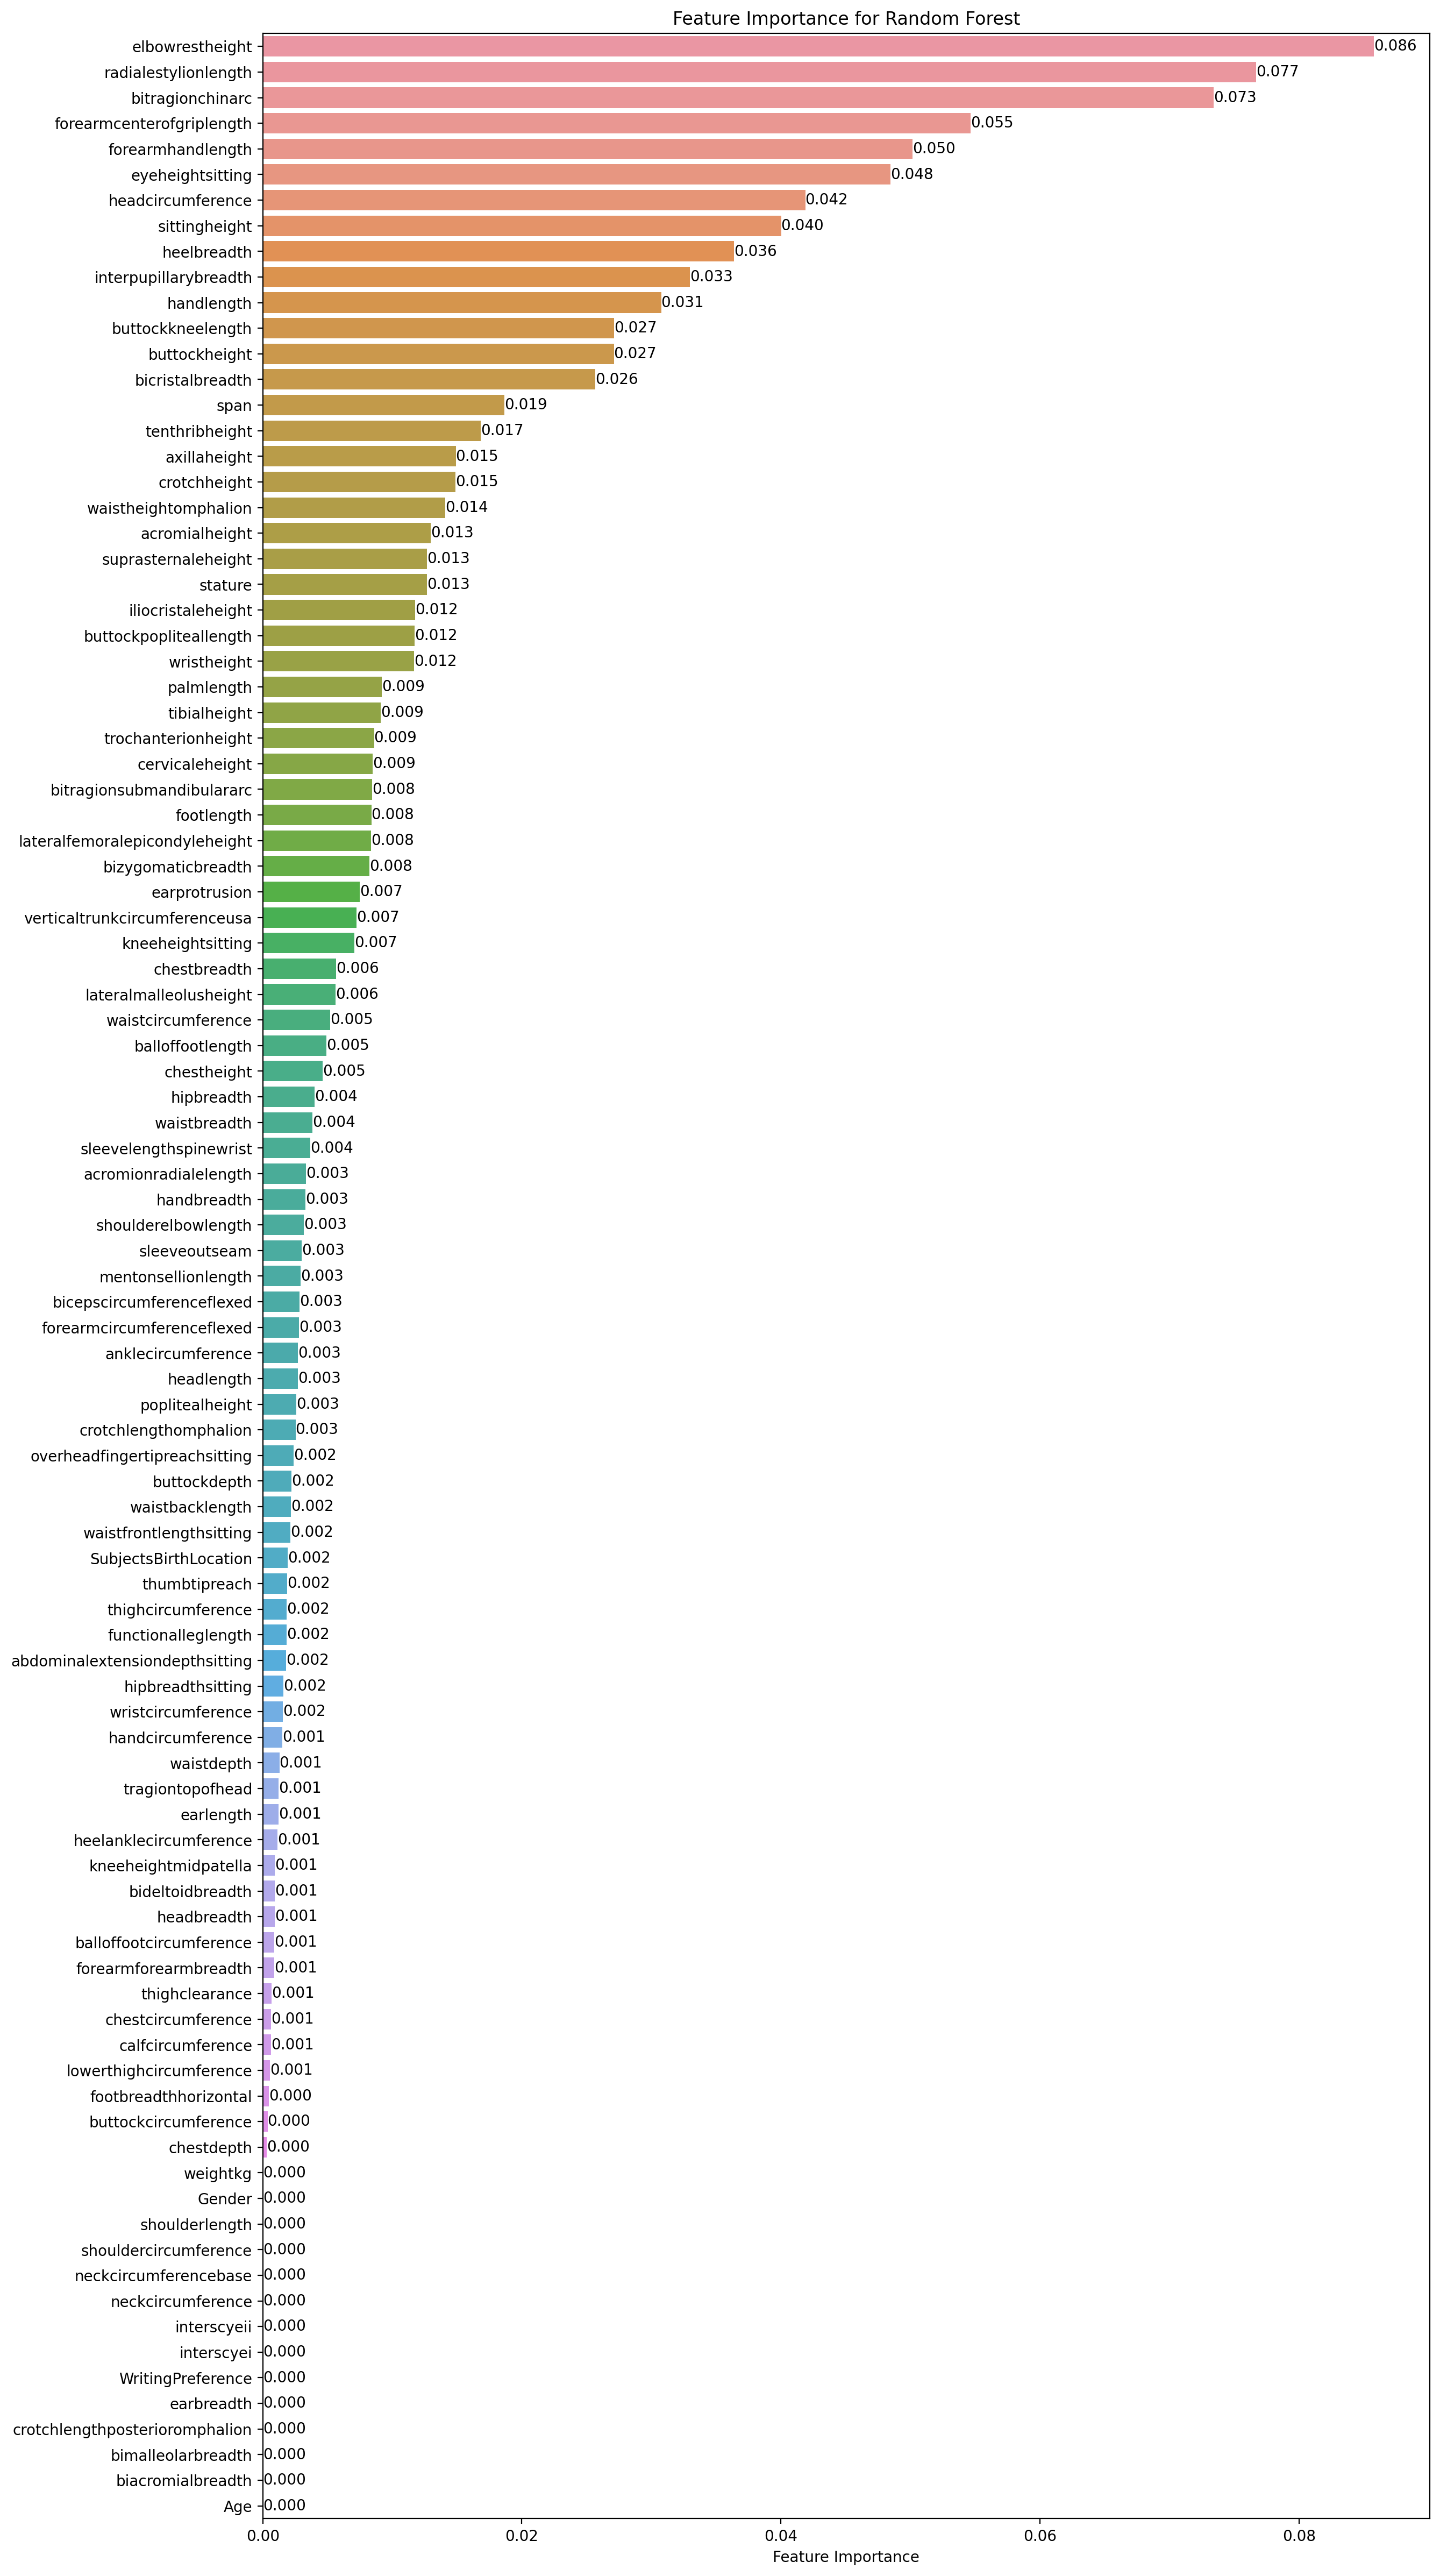

In [217]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [218]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [219]:
RF_model = RandomForestClassifier(random_state=101,
                                  max_samples=0.5)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [220]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[111   2  18]
 [  3   5  40]
 [ 10   2 183]]
              precision    recall  f1-score   support

       Black       0.90      0.85      0.87       131
    Hispanic       0.56      0.10      0.18        48
       White       0.76      0.94      0.84       195

    accuracy                           0.80       374
   macro avg       0.74      0.63      0.63       374
weighted avg       0.78      0.80      0.77       374


Train_Set
[[521   0   4]
 [  5 164  22]
 [  0   0 780]]
              precision    recall  f1-score   support

       Black       0.99      0.99      0.99       525
    Hispanic       1.00      0.86      0.92       191
       White       0.97      1.00      0.98       780

    accuracy                           0.98      1496
   macro avg       0.99      0.95      0.97      1496
weighted avg       0.98      0.98      0.98      1496



### RF Model GridsearchCV

In [221]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [222]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [223]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [224]:
rf_grid_model.best_score_

0.5904183535762483

In [225]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[89 30 12]
 [ 3 32 13]
 [44 65 86]]
              precision    recall  f1-score   support

       Black       0.65      0.68      0.67       131
    Hispanic       0.25      0.67      0.37        48
       White       0.77      0.44      0.56       195

    accuracy                           0.55       374
   macro avg       0.56      0.60      0.53       374
weighted avg       0.67      0.55      0.57       374


Train_Set
[[371 126  28]
 [ 28 123  40]
 [152 263 365]]
              precision    recall  f1-score   support

       Black       0.67      0.71      0.69       525
    Hispanic       0.24      0.64      0.35       191
       White       0.84      0.47      0.60       780

    accuracy                           0.57      1496
   macro avg       0.59      0.61      0.55      1496
weighted avg       0.71      0.57      0.60      1496



### Vanilla XGBoost Model

In [228]:
from xgboost import XGBClassifier

operations_gb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_gb = Pipeline(steps=operations_gb)

y_train_gb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_gb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})


pipe_model_gb.fit(X_train, y_train_gb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_by...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [230]:
eval_metric(pipe_model_gb, X_train, y_train_gb, X_test, y_test_gb)

Test_Set
[[115   2  14]
 [  3  19  26]
 [  7   1 187]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       131
           1       0.86      0.40      0.54        48
           2       0.82      0.96      0.89       195

    accuracy                           0.86       374
   macro avg       0.87      0.74      0.78       374
weighted avg       0.86      0.86      0.85       374


Train_Set
[[525   0   0]
 [  0 191   0]
 [  0   0 780]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       191
           2       1.00      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



###XGBoost Model Cross validation

In [231]:
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])

scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [234]:
from sklearn.model_selection import cross_val_score, cross_validate


xgb_classifier = XGBClassifier()

pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train_gb)

scores = cross_validate(
    pipe_model, X_train, y_train_gb, scoring=scoring,
    cv=10, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                   3.752
score_time                 0.028
test_f1_hispanic           0.399
train_f1_hispanic          1.000
test_precision_hispanic    0.653
train_precision_hispanic   1.000
test_recall_hispanic       0.293
train_recall_hispanic      1.000
dtype: float64

#### **XGBoost Model GridsearchCV**

In [236]:
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

pipe_model_gb = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model_gb, param_grid, cv=5, scoring=recall_hispanic,
    return_train_score=True, verbose=2)
grid_search.fit(X_train, y_train_gb)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   1.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   0.3s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      cal...
                                                      num_parallel_tree=None,
                                                      objective='multi:softprob', ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [237]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [238]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.304
mean_train_score   0.997
Name: 193, dtype: object

In [240]:
eval_metric(grid_search, X_train, y_train_gb, X_test, y_test_gb)

Test_Set
[[118   4   9]
 [  3  16  29]
 [  7   5 183]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       131
           1       0.64      0.33      0.44        48
           2       0.83      0.94      0.88       195

    accuracy                           0.85       374
   macro avg       0.80      0.72      0.74       374
weighted avg       0.84      0.85      0.83       374


Train_Set
[[523   0   2]
 [  0 189   2]
 [  0   0 780]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      0.99      0.99       191
           2       0.99      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



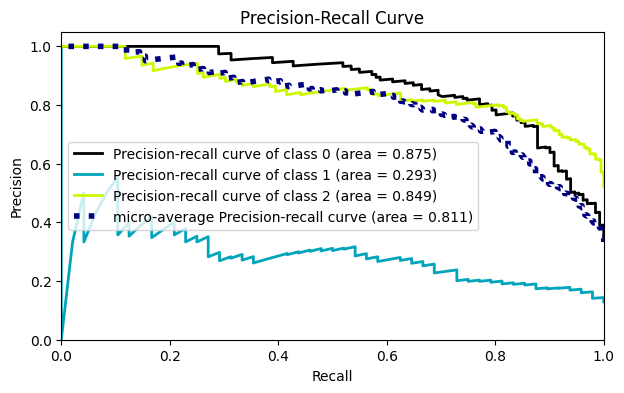

In [259]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_gb)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_gb, y_pred_proba)
plt.show()

In [281]:
y_test_gb_dummies = pd.get_dummies(y_test_gb).values

In [282]:
average_precision_score(y_test_gb_dummies[:, 1], y_pred_proba[:, 1])

0.29275099541473965

In [406]:
y_pred = pipe_model_gb.predict(X_test)

In [407]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

XGB_f1 = f1_score(y_test_encoded, y_pred, average='weighted')
XGB_recall = recall_score(y_test_encoded, y_pred, average='weighted')

**Random Search**

In [241]:
# Define the hyperparameter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_grid = {
    "xgboost__n_estimators":np.arange(3,201, step=1),      # Integer
    "xgboost__max_depth":np.arange(3,11, step=1),                 # Integer
    "xgboost__learning_rate": np.arange(0.001,3, step=0.04),    # float
    "xgboost__subsample":np.arange(0.5,1, step=0.1),          # float
    "xgboost__colsample_bytree": np.arange(0.5, 1, step=0.1),   # float
    "xgboost__reg_alpha": np.arange(0, 1, step=0.1),            # float
    "xgboost__gamma": np.arange(0, 11,step=0.5),               # float
}

xgb_classifier = XGBClassifier()
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])

# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=5,
    verbose=2,
    return_train_score=True,
    scoring=recall_hispanic
)

# Fit the random search model
random_search.fit(X_train, y_train_gb)

Streaming output truncated to the last 5000 lines.
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=1.521, xgboost__max_depth=8, xgboost__n_estimators=42, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=1.521, xgboost__max_depth=8, xgboost__n_estimators=42, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=1.521, xgboost__max_depth=8, xgboost__n_estimators=42, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   0.3s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=1.521, xgboost__max_depth=8, xgboost__n_estimators=42, xgboost__reg_alpha=0.4, xgboost__subsample=0.6; total time=   0.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__gamma=0.0, xgboost__learning_rate=1.521, xgboost__max_depth=8, xgboost__n_estima

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=No...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200]),
                                        'xgboost__reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgboost__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   return_train_score=True,
                   scoring=make_scorer(recall_score, average=None, labels=[1]),
                   verbose=2)

In [242]:
random_search.best_params_

{'xgboost__subsample': 0.5,
 'xgboost__reg_alpha': 0.2,
 'xgboost__n_estimators': 63,
 'xgboost__max_depth': 7,
 'xgboost__learning_rate': 2.3209999999999997,
 'xgboost__gamma': 10.5,
 'xgboost__colsample_bytree': 0.5}

In [243]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.481
mean_train_score   0.704
Name: 494, dtype: object

In [245]:
eval_metric(random_search, X_train, y_train_gb, X_test, y_test_gb)

Test_Set
[[ 95  19  17]
 [  6  16  26]
 [ 19  34 142]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       131
           1       0.23      0.33      0.27        48
           2       0.77      0.73      0.75       195

    accuracy                           0.68       374
   macro avg       0.60      0.60      0.59       374
weighted avg       0.71      0.68      0.69       374


Train_Set
[[414  50  61]
 [ 39  75  77]
 [ 67  70 643]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       525
           1       0.38      0.39      0.39       191
           2       0.82      0.82      0.82       780

    accuracy                           0.76      1496
   macro avg       0.67      0.67      0.67      1496
weighted avg       0.76      0.76      0.76      1496



# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

* We need to use the Undersampling and over sampling methods to balanced the target column (classes)

In [246]:
!pip install imblearn

In [247]:
# Using the ClusterCentroids to balance the target column
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

## Logistic Regression "Under Sampling"

In [252]:
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test)
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[('Black', 191), ('Hispanic', 191), ('White', 191)]


In [253]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=10, solver='saga')

In [254]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [255]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[106  17   8]
 [  5  33  10]
 [ 13  48 134]]
              precision    recall  f1-score   support

       Black       0.85      0.81      0.83       131
    Hispanic       0.34      0.69      0.45        48
       White       0.88      0.69      0.77       195

    accuracy                           0.73       374
   macro avg       0.69      0.73      0.69       374
weighted avg       0.80      0.73      0.75       374


Train_Set
[[158  22  11]
 [ 30 116  45]
 [ 10  29 152]]
              precision    recall  f1-score   support

       Black       0.80      0.83      0.81       191
    Hispanic       0.69      0.61      0.65       191
       White       0.73      0.80      0.76       191

    accuracy                           0.74       573
   macro avg       0.74      0.74      0.74       573
weighted avg       0.74      0.74      0.74       573



## Logistic Regression "Over Sampling"

In [256]:
#Using Somte to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train)

print(sorted(Counter(y_resampled).items()))

[('Black', 191), ('Hispanic', 191), ('White', 191)]


In [257]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=10, solver="saga")

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=10, solver='saga')

In [258]:
eval_metric_(lr_resampled, X_resampled_Over, y_resampled_Over, X_test, y_test)

Test_Set
[[105  18   8]
 [  5  33  10]
 [ 13  48 134]]
              precision    recall  f1-score   support

       Black       0.85      0.80      0.83       131
    Hispanic       0.33      0.69      0.45        48
       White       0.88      0.69      0.77       195

    accuracy                           0.73       374
   macro avg       0.69      0.73      0.68       374
weighted avg       0.80      0.73      0.75       374


Train_Set
[[158  22  11]
 [ 30 116  45]
 [ 10  28 153]]
              precision    recall  f1-score   support

       Black       0.80      0.83      0.81       191
    Hispanic       0.70      0.61      0.65       191
       White       0.73      0.80      0.77       191

    accuracy                           0.75       573
   macro avg       0.74      0.75      0.74       573
weighted avg       0.74      0.75      0.74       573



**As a result, It's important to carefully evaluate the performance of your model after using SMOTE and consider other techniques such as adjusting class weights or using different sampling strategies if necessary.**
**Moreover, The performance of the LR model after under_over sampling had witnessed an intelligible drop.**

## Other Evaluation Metrics for Multiclass Classification

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

[Text(0, 0, '0.909'),
 Text(0, 0, '0.866'),
 Text(0, 0, '0.858'),
 Text(0, 0, '0.655')]

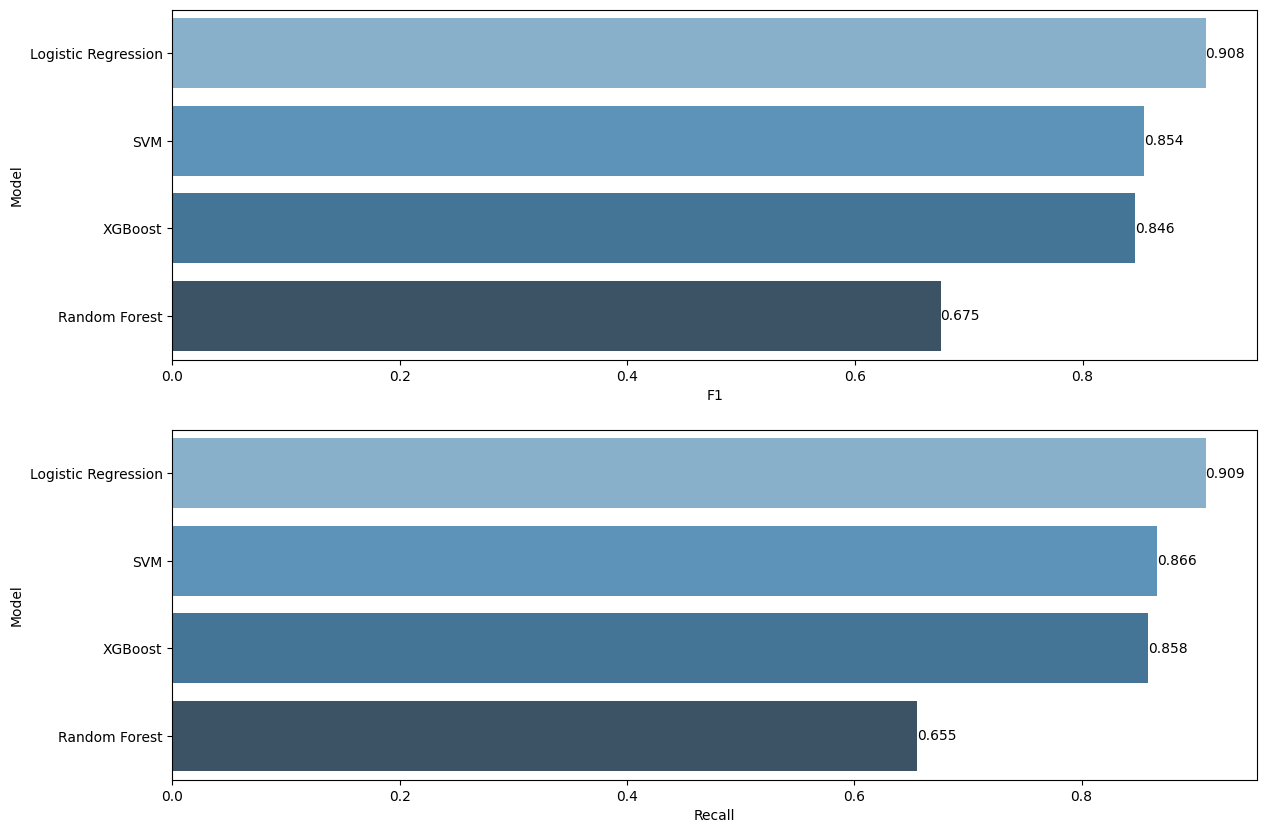

In [429]:
#comparing the models to choose the best model
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1, svc_f1, RF_f1, XGB_f1],
        "Recall": [log_recall, svc_recall, RF_recall, XGB_recall],
    }
)

plt.figure(figsize=(14, 10))
plt.subplot(211)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

**As a result, the logistic regression model achieves the best results among all the other models. Furthermore, the project could be enhanced by choosing the most important features.**

## **The best Model LR** ✅

In [359]:
column_trans_last = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    remainder=MinMaxScaler(),
)

operations_last = [
    ("OneHotEncoder", column_trans_last),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

last_model = Pipeline(steps=operations_last)

In [360]:
last_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

# The implementation of matthews_corrcoef and cohen_kappa

In [367]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
#Using the matthews_corrcoef and cohen_kappa_score metrics for imbalanced dataset (our data)

y_pred = last_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.8793322451806981

In [368]:
cohen_kappa_score(y_test, y_pred)

0.8763811502502596

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___